# Explore here

In [2]:
# import libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
#Load Data
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Valores nulos
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Valores duplicados

duplicates = data.duplicated()

# Cuenta la cantidad de filas duplicadas
num_duplicates = duplicates.sum()

# Muestra las filas duplicadas
duplicated_rows = data[duplicates]

print(f"Número total de filas duplicadas: {num_duplicates}")
print("Filas duplicadas:")
print(duplicated_rows)

Número total de filas duplicadas: 1
Filas duplicadas:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [7]:
# Eliminar las filas duplicadas en su totalidad y modifica el DataFrame existente
data.drop_duplicates(inplace=True)
# Imprime el DataFrame resultante sin duplicados
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [8]:
import pandas as pd
# For a start, we will encode categorical features into numericals

# Convertir variables categóricas a variables dummy (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Calcula la matriz de correlación
correlation_matrix = data_encoded.corr()

# Imprime la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                       age       bmi  children   charges  sex_female  \
age               1.000000  0.109344  0.041536  0.298308    0.019814   
bmi               0.109344  1.000000  0.012755  0.198401   -0.046397   
children          0.041536  0.012755  1.000000  0.067389   -0.017848   
charges           0.298308  0.198401  0.067389  1.000000   -0.058044   
sex_female        0.019814 -0.046397 -0.017848 -0.058044    1.000000   
sex_male         -0.019814  0.046397  0.017848  0.058044   -1.000000   
smoker_no         0.025587 -0.003746 -0.007331 -0.787234    0.076596   
smoker_yes       -0.025587  0.003746  0.007331  0.787234   -0.076596   
region_northeast  0.001868 -0.138178 -0.023202  0.005945    0.002008   
region_northwest  0.001495 -0.136138  0.026044 -0.038695    0.012482   
region_southeast -0.012311  0.270057 -0.023492  0.073578   -0.017578   
region_southwest  0.009415 -0.006211  0.021538 -0.043637    0.003767   

                  sex_male  smoker_no  s

In [26]:
import pandas as pd

# Convertir variables categóricas a variables dummy (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Asegurarse de que todas las columnas sean numéricas (eliminar columnas no numéricas si es necesario)
numeric_data = data_encoded.select_dtypes(include=['number'])

# Calcula la correlación de 'charges' con todas las demás columnas y ordena los resultados
correlation_with_charges = numeric_data.corr()['charges'].sort_values(ascending=False)

# Imprime los resultados
print("Correlación de 'charges' con otras variables:")
print(correlation_with_charges)


Correlación de 'charges' con otras variables:
charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64


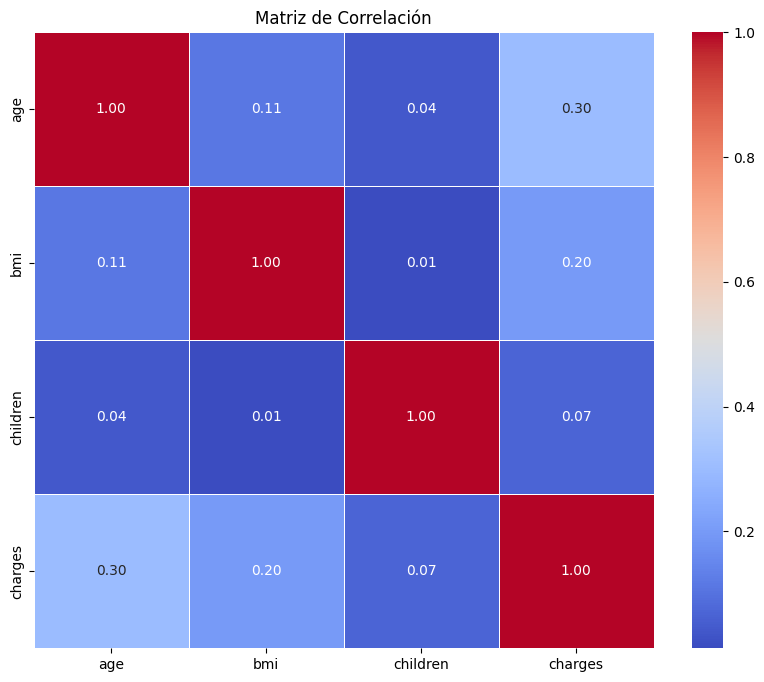

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcula la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()


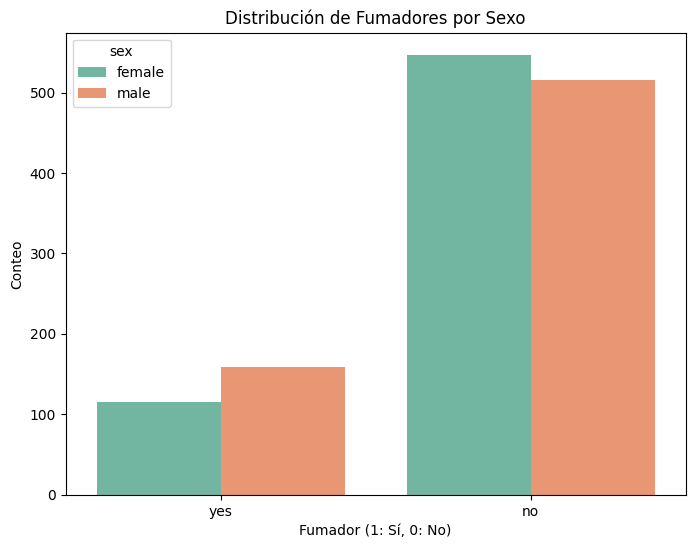

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'data'
# data = ...

# Crear un gráfico de barras para la distribución de fumadores por sexo
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', hue='sex', data=data, palette='Set2')
plt.title('Distribución de Fumadores por Sexo')
plt.xlabel('Fumador (1: Sí, 0: No)')
plt.ylabel('Conteo')
plt.show()


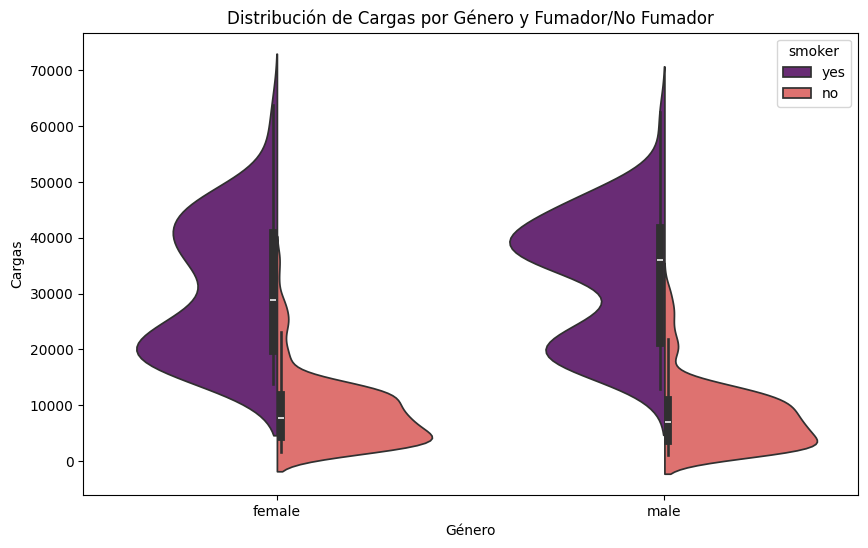

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de violín con Matplotlib
plt.figure(figsize=(10, 6))
sns.violinplot(x="sex", y="charges", hue="smoker", data=data, palette='magma', split=True)
plt.title('Distribución de Cargas por Género y Fumador/No Fumador')
plt.xlabel('Género')
plt.ylabel('Cargas')
plt.show()

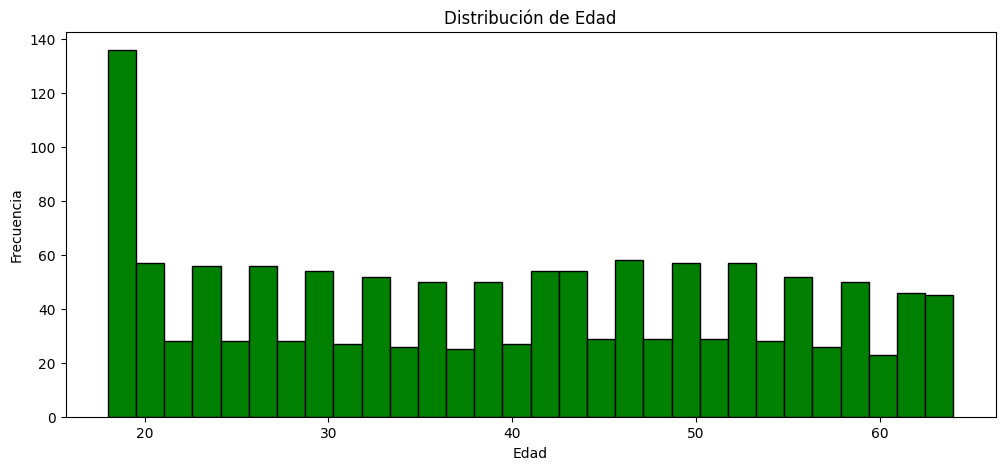

In [19]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'data'
# data = ...

# Crear un gráfico de distribución con Matplotlib
plt.figure(figsize=(12, 5))
plt.title("Distribución de Edad")

# Utilizar el método hist de Matplotlib para crear un histograma
plt.hist(data["age"], bins=30, color='g', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


/tmp/ipykernel_931/1282143057.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="children", palette="ch:.25", data=data)


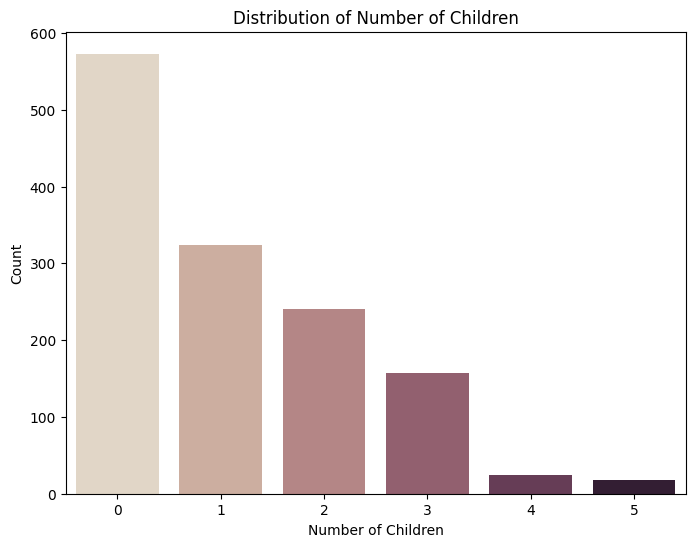

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'data'
# data = ...

# Configuración de la figura
plt.figure(figsize=(8, 6))

# Crear el gráfico de conteo con Matplotlib
sns.countplot(x="children", palette="ch:.25", data=data)

# Añadir etiquetas y título
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Distribution of Number of Children")

# Mostrar el gráfico
plt.show()


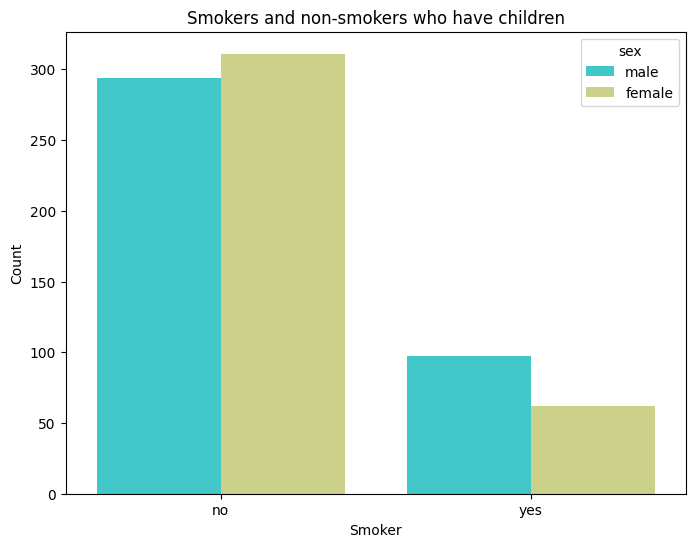

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'data'
# data = ...

# Configuración de la figura
plt.figure(figsize=(8, 6))

# Crear el gráfico de conteo con Matplotlib
sns.countplot(x="smoker", palette="rainbow", hue="sex", data=data[data["children"] > 0])

# Añadir etiquetas y título
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.title("Smokers and non-smokers who have children")

# Mostrar el título
plt.title('Smokers and non-smokers who have children')

# Mostrar el gráfico
plt.show()


Deployed Linear Regression Model

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [36]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'data'
# data = ...

# Convertir variables categóricas a variables dummy (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Asegurarse de que todas las columnas sean numéricas (eliminar columnas no numéricas si es necesario)
numeric_data = data_encoded.select_dtypes(include=['number'])

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
x = numeric_data.drop(['charges'], axis=1)
y = numeric_data['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Ajustar el modelo de regresión lineal
lr = LinearRegression().fit(x_train, y_train)

# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

# Calcular el coeficiente de determinación (R^2) en el conjunto de prueba
r2_score_test = lr.score(x_test, y_test)

print(f'Coeficiente de determinación (R^2) en el conjunto de prueba: {r2_score_test}')


Coeficiente de determinación (R^2) en el conjunto de prueba: 0.15049024178744708


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que tienes un DataFrame llamado 'data'
# data = ...

# Convertir variables categóricas a variables dummy (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Asegurarse de que todas las columnas sean numéricas (eliminar columnas no numéricas si es necesario)
numeric_data = data_encoded.select_dtypes(include=['number'])

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
x = numeric_data.drop(['charges'], axis=1)
y = numeric_data['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Ajustar el modelo de regresión lineal
lr = LinearRegression().fit(x_train, y_train)

# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

# Calcular el error cuadrático medio en el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Error cuadrático medio en el conjunto de entrenamiento: {mse_train}')
print(f'Error cuadrático medio en el conjunto de prueba: {mse_test}')


Error cuadrático medio en el conjunto de entrenamiento: 127204975.30906391
Error cuadrático medio en el conjunto de prueba: 135524405.39773506


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Outliers

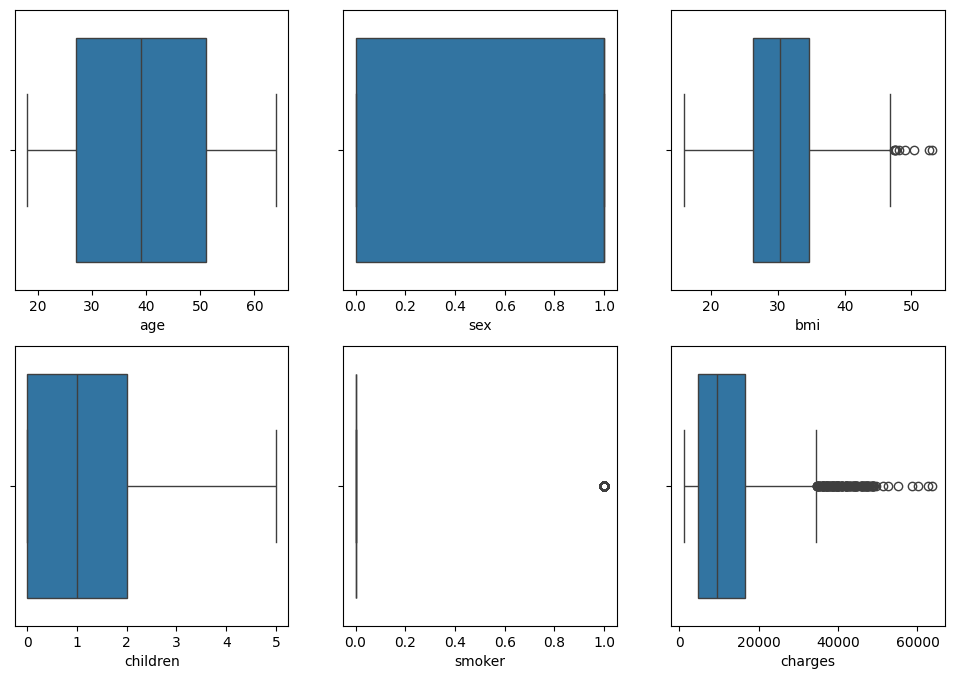

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Box plot para 'age'
plt.subplot(2, 3, 1)
sns.boxplot(x=data['age'])

# Box plot para 'sex'
plt.subplot(2, 3, 2)
sns.boxplot(x=data['sex'])

# Box plot para 'bmi'
plt.subplot(2, 3, 3)
sns.boxplot(x=data['bmi'])

# Box plot para 'children'
plt.subplot(2, 3, 4)
sns.boxplot(x=data['children'])

# Box plot para 'smoker'
plt.subplot(2, 3, 5)
sns.boxplot(x=data['smoker'])

# Box plot para 'charges'
plt.subplot(2, 3, 6)
sns.boxplot(x=data['charges'])

# Mostrar la figura
plt.show()


In [49]:
# Calcular el rango intercuartílico (IQR) para 'charges'
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers en 'charges'
outliers_charges = data[(data['charges'] < lower_limit) | (data['charges'] > upper_limit)]

# Mostrar los outliers
print("Outliers en 'charges':")
print(outliers_charges)


Outliers en 'charges':
      age  sex     bmi  children  smoker      charges
14     27    1  42.130         0       1  39611.75770
19     30    1  35.300         0       1  36837.46700
23     34    0  31.920         1       1  37701.87680
29     31    1  36.300         2       1  38711.00000
30     22    1  35.600         0       1  35585.57600
...   ...  ...     ...       ...     ...          ...
1300   45    1  30.360         0       1  62592.87309
1301   62    1  30.875         3       1  46718.16325
1303   43    1  27.800         0       1  37829.72420
1313   19    0  34.700         2       1  36397.57600
1323   42    0  40.370         2       1  43896.37630

[139 rows x 6 columns]


Cálculo de outliers

In [50]:
# Variables de interés
variables_interes = ["charges", "age", "bmi", "children"]

# Calcular límites superior e inferior para la búsqueda de outliers para cada variable
for variable in variables_interes:
    variable_stats = data[variable].describe()

    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    print(f"\nLímites superior e inferior para la búsqueda de outliers de {variable}:")
    print(f"Superior: {round(upper_limit, 2)}, Inferior: {round(lower_limit, 2)}, Rango intercuartílico: {round(iqr, 2)}")



Límites superior e inferior para la búsqueda de outliers de charges:
Superior: 34524.78, Inferior: -13120.72, Rango intercuartílico: 11911.37

Límites superior e inferior para la búsqueda de outliers de age:
Superior: 87.0, Inferior: -9.0, Rango intercuartílico: 24.0

Límites superior e inferior para la búsqueda de outliers de bmi:
Superior: 47.32, Inferior: 13.67, Rango intercuartílico: 8.41

Límites superior e inferior para la búsqueda de outliers de children:
Superior: 5.0, Inferior: -3.0, Rango intercuartílico: 2.0


Before

In [51]:
# Imprimir estadísticas resumidas después de la eliminación de outliers
print(data.describe())


               age          sex          bmi     children       smoker  \
count  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000   
mean     39.222139     0.504862    30.663452     1.095737     0.204936   
std      14.044333     0.500163     6.100468     1.205571     0.403806   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.290000     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            charges  
count   1337.000000  
mean   13279.121487  
std    12110.359656  
min     1121.873900  
25%     4746.344000  
50%     9386.161300  
75%    16657.717450  
max    63770.428010  


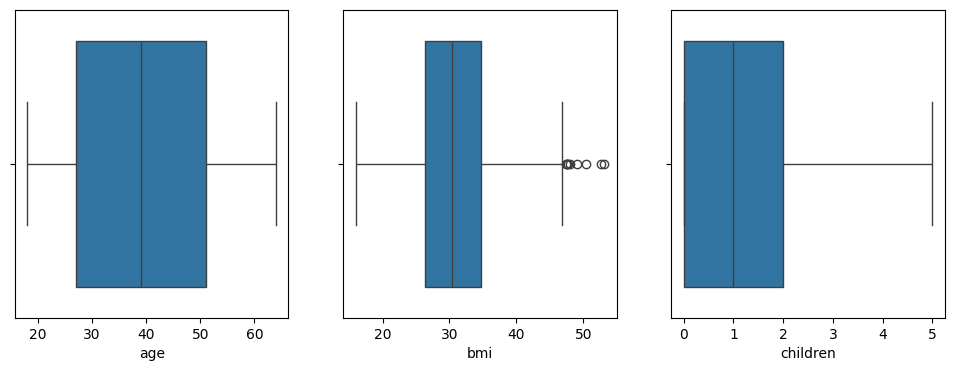

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 4))

# Box plot para 'age'
plt.subplot(1, 3, 1)
sns.boxplot(x=data['age'])

# Box plot para 'bmi'
plt.subplot(1, 3, 2)
sns.boxplot(x=data['bmi'])

# Box plot para 'children'
plt.subplot(1, 3, 3)
sns.boxplot(x=data['children'])

# Mostrar la figura
plt.show()


After

In [53]:
# Definir funciones para eliminar outliers
def remove_outliers(df, variable, upper_limit, lower_limit):
    return df[(df[variable] <= upper_limit) & (df[variable] >= lower_limit)]

# Límites para age
age_upper_limit = 87.0
age_lower_limit = -9.0

# Límites para bmi
bmi_upper_limit = 47.32
bmi_lower_limit = 13.67

# Límites para children
children_upper_limit = 5.0
children_lower_limit = -3.0

# Eliminar outliers
data = remove_outliers(data, "age", age_upper_limit, age_lower_limit)
data = remove_outliers(data, "bmi", bmi_upper_limit, bmi_lower_limit)
data = remove_outliers(data, "children", children_upper_limit, children_lower_limit)


In [54]:
# Imprimir estadísticas resumidas después de la eliminación de outliers
print(data.describe())

               age          sex          bmi     children       smoker  \
count  1328.000000  1328.000000  1328.000000  1328.000000  1328.000000   
mean     39.219127     0.503765    30.537308     1.097139     0.204066   
std      14.042170     0.500174     5.922176     1.208008     0.403169   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.220000     0.000000     0.000000   
50%      39.000000     1.000000    30.300000     1.000000     0.000000   
75%      51.000000     1.000000    34.488750     2.000000     0.000000   
max      64.000000     1.000000    46.750000     5.000000     1.000000   

            charges  
count   1328.000000  
mean   13221.047810  
std    11997.547468  
min     1121.873900  
25%     4744.325050  
50%     9369.615750  
75%    16604.302645  
max    62592.873090  


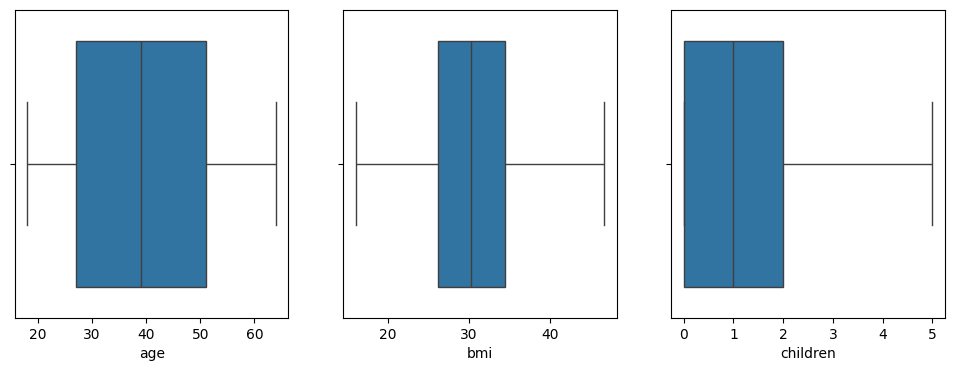

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 4))

# Box plot para 'age'
plt.subplot(1, 3, 1)
sns.boxplot(x=data['age'])

# Box plot para 'bmi'
plt.subplot(1, 3, 2)
sns.boxplot(x=data['bmi'])

# Box plot para 'children'
plt.subplot(1, 3, 3)
sns.boxplot(x=data['children'])

# Mostrar la figura
plt.show()

In [43]:
import pandas as pd

# Supongamos que tu DataFrame se llama df

# Convertir la variable 'sex' a numérica asignando 0 para 'female' y 1 para 'male'
data['sex'] = data['sex'].map({'female': 0, 'male': 1})

# Convertir la variable 'smoker' a numérica asignando 0 para 'no' y 1 para 'yes'
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})

# Convertir la variable 'region' a variables dummy (variables binarias para cada categoría)
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Ahora, todas las variables son numéricas, puedes verificar el resultado
print(data.dtypes)


age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


In [44]:
# Suponiendo que tu DataFrame se llama data
columns_to_drop = ['region_northwest', 'region_southeast', 'region_southwest']

# Eliminar las columnas especificadas
data = data.drop(columns=columns_to_drop)

# Puedes imprimir el DataFrame actualizado para verificar los cambios
print(data.head())


   age  sex     bmi  children  smoker      charges
0   19    0  27.900         0       1  16884.92400
1   18    1  33.770         1       0   1725.55230
2   28    1  33.000         3       0   4449.46200
3   33    1  22.705         0       0  21984.47061
4   32    1  28.880         0       0   3866.85520


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   charges   1337 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 73.1 KB


Entrenamiento del modelo

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [57]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7338546329413108


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Dividir datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(data.drop(['charges'], axis=1), data['charges'], random_state=0)

# Crear DataFrames para los conjuntos de entrenamiento y prueba
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [ ]:
# Cargar conjuntos de entrenamiento y prueba desde archivos CSV
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Separar las características y la variable objetivo nuevamente si es necesario
x_train = train_data.drop(['charges'], axis=1)
y_train = train_data['charges']

x_test = test_data.drop(['charges'], axis=1)
y_test = test_data['charges']


In [61]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Supongamos que ya has importado 'pickle' y 'data'

# Crear conjunto de datos
x = data.drop(['charges'], axis=1)
y = data['charges']

# Dividir datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Crear y entrenar el modelo
lr = LinearRegression().fit(x_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

# Imprimir el rendimiento del modelo
print(lr.score(x_test, y_test))

# Guardar el modelo entrenado con pickle
with open('modelo_linear_regression.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)

0.7338546329413108


In [ ]:
# Cargar el modelo guardado con pickle
'''with open('modelo_linear_regression.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Ahora puedes utilizar 'loaded_model' para hacer predicciones como lo harías con 'lr''''


Optimizacion del modelo: ¿No aplica? 